# EC2202 Sorting

## Student Information

* Student ID: 20225056
* Name: 김창완

**Disclaimer.**
This code examples are based on 
1. [MIT 6.006 (Professor Erik Demaine, Dr. Jason Ku, and Professor Justin Solomon)](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-spring-2020/index.htm)
2. [KAIST CS206 (Professor Otfried Cheong)](https://otfried.org/courses/cs206/)
3. [LeetCode](https://leetcode.com/)
4. [GeeksForGeeks](https://practice.geeksforgeeks.org/)
5. Coding Interviews

## Course Logistics

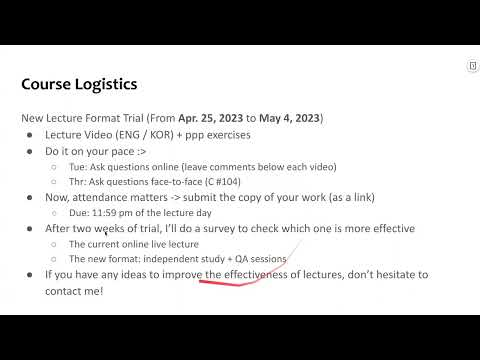

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gs4LqvXwjFQ')


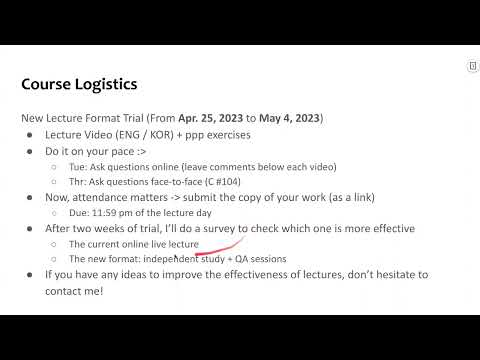

In [ ]:
YouTubeVideo('-ykUwMI__K0')

In [ ]:
import doctest
import random
import time

## Sorting

### Motivation

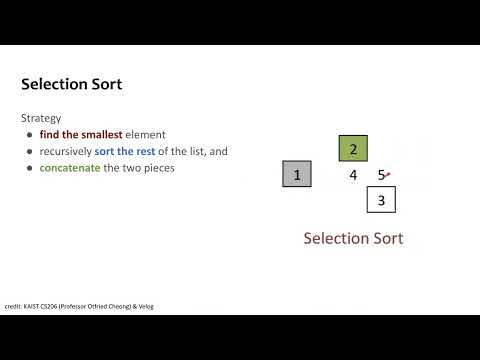

In [ ]:
YouTubeVideo('HwaLxO90rf0')

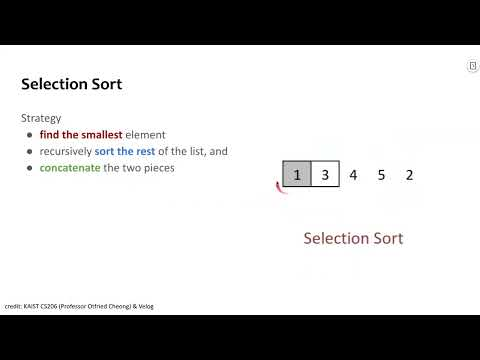

In [ ]:
YouTubeVideo('vjX0g_qjTZ8')

Algorithms often use sorting as a key subroutine. For example, consider the problem of checking whether a list contains duplicated data: The first of the following two algorithms takes O(n^2) time, while the second one uses sorting and then takes only linear time.

In [ ]:
def has_duplicates(a):
  for i in range(len(a)):
    for j in range(i+1, len(a)):
      if a[i] == a[j]:
        return True
  return False

In [ ]:
# This function assumes that a is sorted!
def has_duplicates_sorted(a):
  for i in range(len(a)-1):
    if a[i] == a[i+1]:
      return True
  return False

Let's test our implementation

In [ ]:
w = list(range(1, 20000))
w.append(8888)
random.shuffle(w)

t1 = time.time()
print(has_duplicates(w))
t2 = time.time()
print("time spent:", t2-t1)

True
time spent: 2.4357669353485107


In [ ]:
def has_duplicates(a):
  return has_duplicates_sorted(sorted(a))

In [ ]:
w = list(range(1, 100000))
w.append(8888)
random.shuffle(w)

t1 = time.time()
print(has_duplicates(w))
t2 = time.time()
print("time spent:", t2-t1)

True
time spent: 0.039228200912475586


### Selection Sort

We find the smallest element, recursively sort the rest of the list, and concatenate the two pieces:

In [ ]:
# find index of minimum in a
# O(N)
def find_min_index(a):
  mindex = 0
  for k in range(1, len(a)):
    if a[k] < a[mindex]:
      mindex = k
  return mindex

# T(N) = T(N-1) + O(N)
# T(N) = O(N^2)
def selection_sort(a):
  if len(a) <= 1:  # 항상 특별한 경우 상정해주고 시작하기.
    return a
  k = find_min_index(a)
  b = selection_sort(a[:k] + a[k+1:])
  return [a[k]]+b

Let's test our implmementation

In [ ]:
w = [ random.randrange(1000) for i in range(100) ]
print(w)
ws = selection_sort(w)
print(ws)

[79, 27, 615, 685, 806, 180, 692, 331, 598, 497, 188, 113, 757, 264, 655, 406, 14, 877, 753, 697, 936, 389, 79, 526, 82, 8, 338, 193, 954, 96, 837, 185, 250, 788, 157, 272, 384, 43, 430, 670, 751, 390, 668, 831, 95, 466, 725, 396, 90, 983, 902, 705, 90, 886, 461, 134, 540, 171, 395, 665, 35, 770, 641, 264, 980, 222, 968, 54, 43, 342, 674, 887, 535, 900, 443, 269, 815, 968, 633, 435, 401, 860, 130, 586, 121, 175, 972, 791, 212, 378, 77, 203, 645, 957, 624, 633, 129, 260, 994, 587]
[8, 14, 27, 35, 43, 43, 54, 77, 79, 79, 82, 90, 90, 95, 96, 113, 121, 129, 130, 134, 157, 171, 175, 180, 185, 188, 193, 203, 212, 222, 250, 260, 264, 264, 269, 272, 331, 338, 342, 378, 384, 389, 390, 395, 396, 401, 406, 430, 435, 443, 461, 466, 497, 526, 535, 540, 586, 587, 598, 615, 624, 633, 633, 641, 645, 655, 665, 668, 670, 674, 685, 692, 697, 705, 725, 751, 753, 757, 770, 788, 791, 806, 815, 831, 837, 860, 877, 886, 887, 900, 902, 936, 954, 957, 968, 968, 972, 980, 983, 994]


In-place + recursive implementation

In [ ]:
def find_min_index(a, i):
  mindex = i
  for k in range(i+1, len(a)):
    if a[k] < a[mindex]:
      mindex = k
  return mindex

# sort a[i:]
def selection_sort_inplace(a, i=0):
  if len(a) - i <= 1:
    return
  k = find_min_index(a, i)
  # exchange a[i] and a[k]
  t = a[i]
  a[i] = a[k]
  a[k] = t
  # sort the rest
  selection_sort_inplace(a, i+1)

In-place + iterative implementation

In [ ]:
def selection_sort_inplace_iter(a):
  n = len(a)
  for i in range(0, n-1):
    k = find_min_index(a, i)
    # exchange a[i] and a[k]
    t = a[i]
    a[i] = a[k]
    a[k] = t

### Insertion Sort

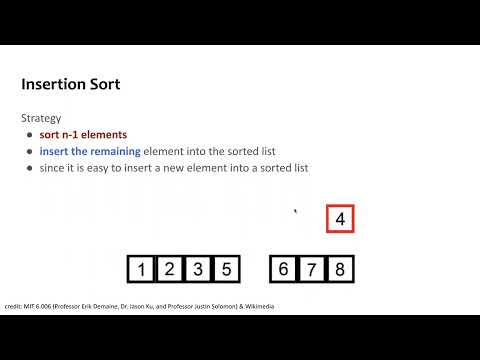

In [ ]:
YouTubeVideo('4cS1EZOJ5ug')

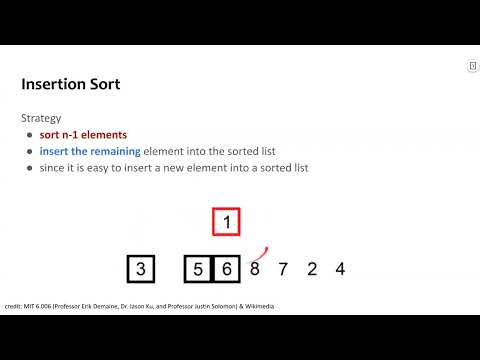

In [ ]:
YouTubeVideo('URD_vVpx_5Y')

Insertion sort uses recursion the other way round: we recursively sort n − 1 elements, and finally insert the remaining element into the sorted list. It is based on the observation that it is easy to insert a new element into a sorted list. Here is a version that keeps the original data intact:

In [ ]:
def sorted_linear_search(a, x):
  for i in range(len(a)):
    if a[i] >= x:
      return i
  return len(a)

def insertion_sort(a):
  if len(a) <= 1:
    return a
  b = insertion_sort(a[:-1])
  k = sorted_linear_search(b, a[-1])
  b.insert(k, a[-1])
  return b

In [ ]:
w = [ random.randrange(1000) for i in range(100) ]
print(w)
ws = insertion_sort(w)
print(ws)

[969, 545, 963, 512, 844, 582, 314, 791, 613, 779, 293, 750, 369, 457, 414, 884, 577, 186, 490, 124, 545, 16, 585, 828, 478, 371, 174, 431, 31, 551, 664, 727, 760, 302, 285, 185, 471, 379, 139, 22, 355, 571, 478, 890, 388, 57, 227, 762, 355, 91, 948, 714, 714, 736, 749, 833, 863, 147, 423, 104, 895, 45, 364, 920, 773, 701, 735, 719, 954, 826, 117, 358, 981, 674, 886, 478, 318, 581, 739, 638, 717, 991, 645, 307, 13, 749, 274, 918, 393, 586, 791, 512, 173, 511, 319, 536, 578, 692, 400, 790]
[13, 16, 22, 31, 45, 57, 91, 104, 117, 124, 139, 147, 173, 174, 185, 186, 227, 274, 285, 293, 302, 307, 314, 318, 319, 355, 355, 358, 364, 369, 371, 379, 388, 393, 400, 414, 423, 431, 457, 471, 478, 478, 478, 490, 511, 512, 512, 536, 545, 545, 551, 571, 577, 578, 581, 582, 585, 586, 613, 638, 645, 664, 674, 692, 701, 714, 714, 717, 719, 727, 735, 736, 739, 749, 749, 750, 760, 762, 773, 779, 790, 791, 791, 826, 828, 833, 844, 863, 884, 886, 890, 895, 918, 920, 948, 954, 963, 969, 981, 991]


**'ppp' exercise** In-place implementation

In [ ]:
# sort a[:j]
def insertion_sort(a, j):
  if len(a) <= 1:
    return a
  a = insertion_sort(a[:-1])
  k = sorted_linear_search(a, a[-1])
  a.insert(k, a[-1])
  return a


In [ ]:
### Sol. code
def insertion_sort(a, j):
  if j <= 1:
    return
  insertion_sort(a, j-1) # sort the remaining j-1 items
  # then, insert the last item a[j] a[0...j-1]
  k = j-1
  x = a[k]
  while k > 0 and a[k-1] > x:
    a[k] = a[k-1]
    k -= 1
  a[k] = x
  

In-place + iterative implementation

In [ ]:
def insertion_sort(a):
  n = len(a)
  t = a[-1]
  for i in range(0, n-1):
    a[i+1] = a[i]

In [ ]:
### Sol. code
def insertion_sort(a):
  # where ?

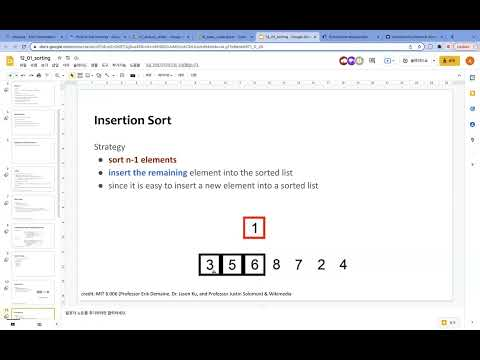

In [ ]:
YouTubeVideo('PxS3-hv8zCc')

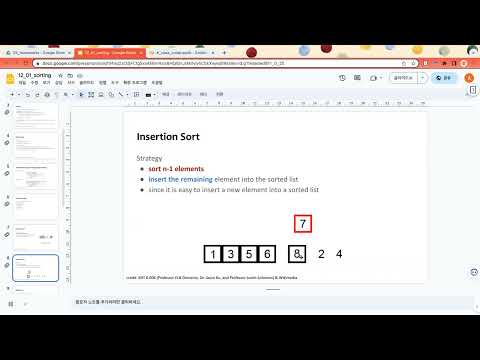

In [ ]:
YouTubeVideo('kqaCsg8PHog')

### Bubble Sort

It’s called “bubble sort” because large elements “rise” to the end of the array like bubbles in a carbonated drink. What makes it so simple is the fact that it only uses exchanges of adjacent elements:

**'ppp' exercise**

In [ ]:
def bubble_sort(a):
  a[:-1] = bubble_sort(a.pop())
  for i in range(0, len(a)):
    if a[i] < a[i+1]:
        t = a[i]
        a[i] = a[i+1]
        a[i+1] = t
    else:
      break
    return a

In [ ]:
### Sol. code
def bubble_sort(a):
  for last in range(len(a), 1, -1):
    # bubble max in a[:last] to a[last-1]
    # last: len(a) -> ... -> 2
    #  j  : 0 ~ len(a)-1 -> ... -> 0 ~ 1
    #    [start]  [end]
    flipped = False
    for j in range(last-1):
      if a[j] > a[j+1]:
        flipped = True
        t = a[j]
        a[j] = a[j+1]
        a[j+1] = t
    if not flipped:  # 몇바퀴 돌아야 하는지 모르니까 넣은 조건문.
      return

One observation about bubble sort is that we can stop once a bubble phase has made no more change—then we know that the array is already in sorted order.

In [ ]:
def bubble_sort(a):
  # YOUR CODE HERE

Does this improve the time complexity of the algorithm? In the best case, when the input data is already sorted, the running time improves from O(n^2) to O(n). The case of sorted or nearly-sorted input is important, so this is an important improvement.

Unfortunately, in the worst case early termination does not help. The reason is that in every bubble round, the smallest element in the list can only move one position down. So if we start with any list where the smallest element is in the last position, it must take n − 1 bubble rounds to finish. And therefore bubble sort with early termination still takes quadratic time(아마 O(N^2)를 말하는 듯) in the worst case.

### Merge Sort

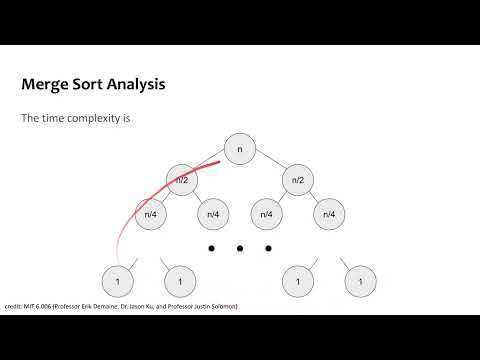

In [ ]:
YouTubeVideo('wjE25BU3BmA')

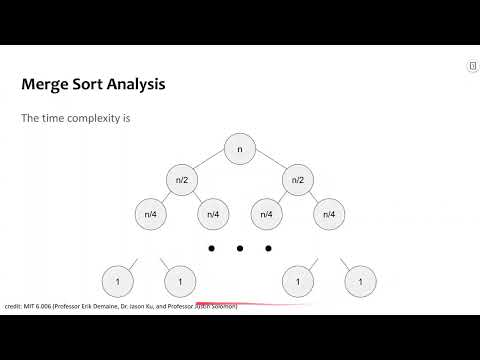

In [ ]:
YouTubeVideo('jg4759KNDXw')

All the sorting algorithms we have seen so far have a time complexity of O(n^2).

We split the list into two halves, sort each sublist recursively, and then merge the two sorted lists.. 

In [ ]:
def merge(a, b):
  i = 0
  j = 0
  res = []
  while i < len(a) and j < len(b):
    va = a[i]
    vb = b[j]
    if va <= vb:
      res.append(va)
      i += 1
    else:
      res.append(vb)
      j += 1
  # now just copy remaining elements
  # (only one of these can be non-empty)
  res.extend(a[i:])
  res.extend(b[j:])
  return res

def merge_sort(a):
  if len(a) <= 1:
    return a
  mid = len(a) // 2
  left_half = merge_sort(a[:mid])
  right_half = merge_sort(a[mid:])
  return merge(left_half, right_half)

In [ ]:
n = 1000000
w = [ random.randrange(1000000) for i in range(n) ]
print(w[:100])
startTime = time.time()
w = merge_sort(w)
stopTime = time.time()
print(w[:100])

print("Runtime %g secs" % (stopTime - startTime))

[47709, 404481, 629798, 522875, 305195, 839812, 902792, 25149, 501629, 353786, 240470, 477895, 963135, 982371, 589015, 74699, 189284, 818151, 530553, 977049, 833206, 254819, 308460, 721798, 806696, 924938, 533889, 755034, 546130, 45313, 386684, 196424, 865000, 327595, 191509, 585786, 248516, 467100, 472320, 493458, 643842, 427452, 434745, 33053, 496672, 997981, 248882, 557053, 224439, 368645, 69393, 407741, 972049, 836790, 428528, 803355, 633424, 563337, 145828, 238492, 628235, 478025, 633333, 237968, 208556, 675529, 886837, 221375, 672959, 108230, 426901, 937819, 803907, 657219, 698148, 25025, 192851, 789159, 553968, 917166, 264314, 731198, 981189, 410013, 931547, 316249, 33028, 96525, 529549, 4420, 510768, 700545, 937538, 730511, 199416, 37935, 879514, 438379, 816504, 987707]
[1, 2, 2, 3, 4, 4, 8, 9, 11, 12, 13, 13, 14, 15, 15, 15, 17, 17, 18, 18, 20, 21, 22, 22, 25, 25, 25, 27, 27, 28, 30, 30, 30, 31, 32, 33, 33, 34, 34, 34, 36, 36, 39, 40, 42, 42, 47, 47, 48, 48, 49, 51, 51, 52, 53

### Quick Sort

In Merge-Sort, the divide step is trivial, and the combine step is where all the work is done. In Quick-Sort it is the other way round: the combine step is trivial, and all the work is done in the divide step:


In [ ]:
def quick_sort(a):
  if len(a) <= 1:
    return a
  pivot = a[len(a) // 2]
  small = []
  equal = []
  large = []
  for x in a:
    if x < pivot:
      small.append(x)
    elif x == pivot:
      equal.append(x)
    else:
      large.append(x)
  return quick_sort(small) + equal + quick_sort(large)

One advantage of Quick-Sort compared to Merge-Sort is that it can be implemented as an in-place algorithm, needing no extra space except the array storing the elements:

In [ ]:
# partition range a[lo:hi+1] and return index of pivot
def partition(a, lo, hi):
  p = (lo + hi)//2
  pivot = a[p]
  a[p] = a[hi]  # Swap pivot with last item
  a[hi] = pivot

  i = lo - 1
  j = hi
  while i < j: 
    i += 1 
    while a[i] < pivot: 
      i += 1
    j -= 1
    while a[j] > pivot and j > lo: 
      j -= 1
    if i < j:
      t = a[i]; a[i] = a[j]; a[j] = t  # swap a[i] and a[j]
  a[hi] = a[i]
  a[i] = pivot # Put pivot where it belongs
  return i     # index of pivot

# sort range a[lo:hi+1]
def quick_sort(a, lo, hi):
  if (lo < hi):
    pivot = partition(a, lo, hi)
    quick_sort(a, lo, pivot - 1)
    quick_sort(a, pivot  + 1, hi)